In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [28]:
df = pd.read_csv("Resources/prices.csv")

In [29]:
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')

In [30]:
df.set_index('symbol', inplace=True)

In [33]:
df = df.sort_values('date')

In [44]:
df.index.unique()

Index(['SYMC', 'IFF', 'ILMN', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'IDXX',
       ...
       'NAVI', 'QRVO', 'CFG', 'WRK', 'KHC', 'PYPL', 'HPE', 'CSRA', 'WLTW',
       'FTV'],
      dtype='object', name='symbol', length=501)

In [99]:
MSFT_df = df.loc['MSFT', :]

In [100]:
MSFT_df.set_index('date', inplace=True)

In [101]:
MSFT_df.drop('open', axis=1, inplace=True)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


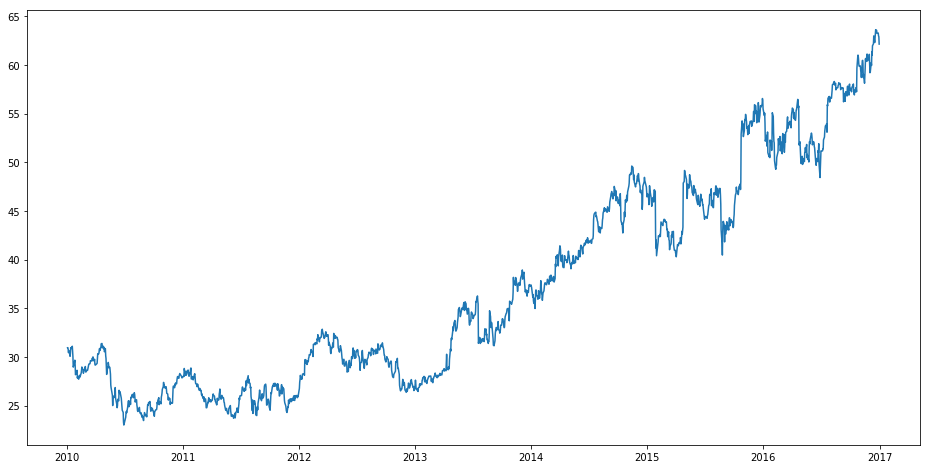

In [102]:
plt.figure(figsize=(16,8))
plt.plot(MSFT_df['close'], label='Close Price history')

In [218]:
MSFT_df

,close,low,high,volume
date,,,,
2010-01-04,30.950001,30.590000,31.100000,38409100.0
2010-01-05,30.959999,30.639999,31.100000,49749600.0
2010-01-06,30.770000,30.520000,31.080000,58182400.0
2010-01-07,30.450001,30.190001,30.700001,50559700.0
2010-01-08,30.660000,30.240000,30.879999,51197400.0
2010-01-11,30.270000,30.120001,30.760000,68754700.0
2010-01-12,30.070000,29.910000,30.400000,65912100.0
2010-01-13,30.350000,30.010000,30.520000,51863500.0
2010-01-14,30.959999,30.260000,31.100000,63228100.0


In [103]:
dataset = MSFT_df.values
dataset

array([[3.0950001e+01, 3.0590000e+01, 3.1100000e+01, 3.8409100e+07],
       [3.0959999e+01, 3.0639999e+01, 3.1100000e+01, 4.9749600e+07],
       [3.0770000e+01, 3.0520000e+01, 3.1080000e+01, 5.8182400e+07],
       ...,
       [6.2990002e+01, 6.2830002e+01, 6.3400002e+01, 1.4653300e+07],
       [6.2900002e+01, 6.2730000e+01, 6.3200001e+01, 1.0250600e+07],
       [6.2139999e+01, 6.2029999e+01, 6.2990002e+01, 2.5579900e+07]])

In [104]:
train = dataset[0:987,:]
valid = dataset[987:,:]
train

array([[3.0950001e+01, 3.0590000e+01, 3.1100000e+01, 3.8409100e+07],
       [3.0959999e+01, 3.0639999e+01, 3.1100000e+01, 4.9749600e+07],
       [3.0770000e+01, 3.0520000e+01, 3.1080000e+01, 5.8182400e+07],
       ...,
       [3.8130001e+01, 3.7820000e+01, 3.8290001e+01, 2.2090400e+07],
       [3.8450001e+01, 3.8060001e+01, 3.8779999e+01, 4.2950400e+07],
       [3.8310001e+01, 3.8080002e+01, 3.8490002e+01, 5.2109800e+07]])

In [196]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [114]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0:4])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [179]:
x_train.shape

(927, 60, 4)

In [117]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],4)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [118]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
 - 57s - loss: 7.2113e-04


In [246]:
X_test, y_test = [], []
for i in range(986,len(MSFT_df)):
    X_test.append(scaled_data[i-60:i,0:4])
    y_test.append(scaled_data[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [247]:
X_test.shape

(776, 60, 4)

In [248]:
closing_price = model.predict(X_test)

In [249]:
final = []
for price in closing_price:
    final.append(np.pad(price, (0, 3), 'constant'))
final

[array([0.3427685, 0.       , 0.       , 0.       ], dtype=float32),
 array([0.34508827, 0.        , 0.        , 0.        ], dtype=float32),
 array([0.34828287, 0.        , 0.        , 0.        ], dtype=float32),
 array([0.3445968, 0.       , 0.       , 0.       ], dtype=float32),
 array([0.34503728, 0.        , 0.        , 0.        ], dtype=float32),
 array([0.34855965, 0.        , 0.        , 0.        ], dtype=float32),
 array([0.3508109, 0.       , 0.       , 0.       ], dtype=float32),
 array([0.35001832, 0.        , 0.        , 0.        ], dtype=float32),
 array([0.34677154, 0.        , 0.        , 0.        ], dtype=float32),
 array([0.34098187, 0.        , 0.        , 0.        ], dtype=float32),
 array([0.3353672, 0.       , 0.       , 0.       ], dtype=float32),
 array([0.32890674, 0.        , 0.        , 0.        ], dtype=float32),
 array([0.3209177, 0.       , 0.       , 0.       ], dtype=float32),
 array([0.31513503, 0.        , 0.        , 0.        ], dtype=float32)

In [236]:
final_price = scaler.inverse_transform(final)

In [250]:
close = []
for price in final_price:
    close.append(price[0])
close

[37.02403443308946,
 37.15376714985269,
 37.004075832881036,
 37.02196365721434,
 37.16500694853899,
 37.25642970647633,
 37.2242437253992,
 37.092391821869555,
 36.857273435847375,
 36.62926176866722,
 36.36690257411364,
 36.04246730392543,
 35.8076333318896,
 35.63382733969188,
 35.60341924859753,
 35.7103891642741,
 35.90711650322747,
 36.11273450236708,
 36.26927838100147,
 36.407843664881376,
 36.45619041174489,
 36.41621027716935,
 36.22557665915766,
 36.03450371230748,
 35.723578711607274,
 35.43880769492891,
 35.255653559622225,
 35.00702974520117,
 34.83047643492249,
 34.851704610755114,
 35.00313629926881,
 35.1193333308261,
 35.22456166468835,
 35.28388316060832,
 35.254375512092054,
 35.261851363980206,
 35.26057694726688,
 35.26955232651287,
 35.29059048959717,
 35.382809606696306,
 35.47220031747156,
 35.518381887221935,
 35.52421539962292,
 35.42502511417737,
 35.360529704250304,
 35.37008964500868,
 35.456187204903635,
 35.61298766126188,
 35.84042686965248,
 36.0599968

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


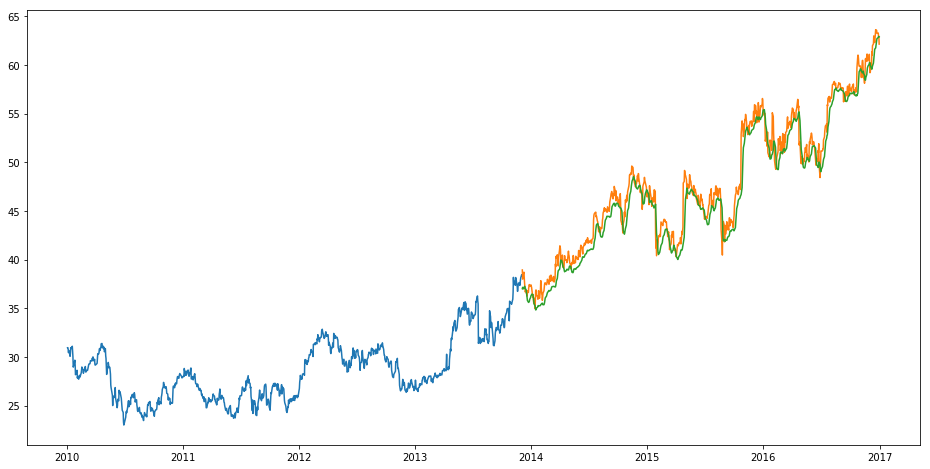

In [251]:
train = MSFT_df[:987]
valid = MSFT_df[987:]
valid['Predictions'] = close
plt.figure(figsize=(16,8))
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])